# ACTIVATION FUNCTIONS

In [1]:
import tensorflow as tf
print(tf.__version__)
!python --version

2.5.0
Python 3.7.11


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

In [3]:
(X_train_, y_train_), (X_test_, y_test_) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


## Data Preprocessing:

In [4]:
# Normalize data
X_train = X_train_.astype('float32') / 255.
X_test = X_test_.astype('float32') / 255.

In [5]:
# One hot encoding labels
y_train = to_categorical(y_train_, 10)
y_test = to_categorical(y_test_, 10)

In [6]:
# Flatten data
X_train = np.reshape(X_train, (60000, 784))
X_test = np.reshape(X_test, (10000, 784))

## Creating NN with sigmoid activation function:

In [7]:
nn_sigmoid = Sequential()
nn_sigmoid.add(Dense(700, input_dim=784, activation='sigmoid'))
nn_sigmoid.add(Dense(700, activation='sigmoid'))
nn_sigmoid.add(Dense(700, activation='sigmoid'))
nn_sigmoid.add(Dense(700, activation='sigmoid'))
nn_sigmoid.add(Dense(700, activation='sigmoid'))
nn_sigmoid.add(Dense(350, activation='sigmoid'))
nn_sigmoid.add(Dense(100, activation='sigmoid'))
nn_sigmoid.add(Dense(10, activation='softmax'))

In [8]:
# Compile model with SGD
nn_sigmoid.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

## Creating NN with the ReLU activation function:

In [9]:
nn_relu = Sequential()
nn_relu.add(Dense(700, input_dim=784, activation='relu'))
nn_relu.add(Dense(700, activation='relu'))
nn_relu.add(Dense(700, activation='relu'))
nn_relu.add(Dense(700, activation='relu'))
nn_relu.add(Dense(700, activation='relu'))
nn_relu.add(Dense(350, activation='relu'))
nn_relu.add(Dense(100, activation='relu'))
nn_relu.add(Dense(10, activation='softmax'))

In [10]:
# Compile model with SGD
nn_relu.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

## Creating NN with the ELU activation function:

In [11]:
nn_elu = Sequential()
nn_elu.add(Dense(700, input_dim=784, activation='elu'))
nn_elu.add(Dense(700, activation='elu'))
nn_elu.add(Dense(700, activation='elu'))
nn_elu.add(Dense(700, activation='elu'))
nn_elu.add(Dense(700, activation='elu'))
nn_elu.add(Dense(350, activation='elu'))
nn_elu.add(Dense(100, activation='elu'))
nn_elu.add(Dense(10, activation='softmax'))

In [12]:
# Compile model with SGD
nn_elu.compile(loss='categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])

## Callback function to store the loss values per batch:

In [13]:
import keras
class history_loss(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
 
    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

## Training the models

In [14]:
n_epochs = 20
batch_size = 256
validation_split = 0.2

In [15]:
history_sigmoid = history_loss()
nn_sigmoid.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
                 callbacks=[history_sigmoid], validation_split=validation_split, verbose=2)

Epoch 1/20
188/188 - 5s - loss: 2.3127 - accuracy: 0.1134 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 2/20
188/188 - 2s - loss: 2.3014 - accuracy: 0.1140 - val_loss: 2.3025 - val_accuracy: 0.1060
Epoch 3/20
188/188 - 1s - loss: 2.3014 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 4/20
188/188 - 2s - loss: 2.3014 - accuracy: 0.1140 - val_loss: 2.3026 - val_accuracy: 0.1060
Epoch 5/20
188/188 - 1s - loss: 2.3014 - accuracy: 0.1140 - val_loss: 2.3023 - val_accuracy: 0.1060
Epoch 6/20
188/188 - 2s - loss: 2.3013 - accuracy: 0.1140 - val_loss: 2.3032 - val_accuracy: 0.1060
Epoch 7/20
188/188 - 1s - loss: 2.3014 - accuracy: 0.1137 - val_loss: 2.3026 - val_accuracy: 0.1060
Epoch 8/20
188/188 - 2s - loss: 2.3014 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 9/20
188/188 - 2s - loss: 2.3014 - accuracy: 0.1140 - val_loss: 2.3023 - val_accuracy: 0.1060
Epoch 10/20
188/188 - 2s - loss: 2.3014 - accuracy: 0.1138 - val_loss: 2.3024 - val_accuracy: 0.1060

In [16]:
history_relu = history_loss()
nn_relu.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
                 callbacks=[history_relu], validation_split=validation_split, verbose=2)

Epoch 1/20
188/188 - 2s - loss: 2.2104 - accuracy: 0.3990 - val_loss: 2.0043 - val_accuracy: 0.5891
Epoch 2/20
188/188 - 2s - loss: 1.2904 - accuracy: 0.7148 - val_loss: 0.6761 - val_accuracy: 0.8167
Epoch 3/20
188/188 - 2s - loss: 0.5490 - accuracy: 0.8423 - val_loss: 0.4200 - val_accuracy: 0.8852
Epoch 4/20
188/188 - 1s - loss: 0.4052 - accuracy: 0.8816 - val_loss: 0.3655 - val_accuracy: 0.8904
Epoch 5/20
188/188 - 1s - loss: 0.3408 - accuracy: 0.9005 - val_loss: 0.2971 - val_accuracy: 0.9145
Epoch 6/20
188/188 - 1s - loss: 0.2954 - accuracy: 0.9147 - val_loss: 0.2768 - val_accuracy: 0.9166
Epoch 7/20
188/188 - 1s - loss: 0.2663 - accuracy: 0.9222 - val_loss: 0.2597 - val_accuracy: 0.9235
Epoch 8/20
188/188 - 2s - loss: 0.2402 - accuracy: 0.9300 - val_loss: 0.2580 - val_accuracy: 0.9237
Epoch 9/20
188/188 - 2s - loss: 0.2187 - accuracy: 0.9366 - val_loss: 0.2021 - val_accuracy: 0.9412
Epoch 10/20
188/188 - 2s - loss: 0.2037 - accuracy: 0.9417 - val_loss: 0.2181 - val_accuracy: 0.9369

In [17]:
history_elu = history_loss()
nn_elu.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
                 callbacks=[history_elu], validation_split=validation_split, verbose=2)

Epoch 1/20
188/188 - 2s - loss: 0.8064 - accuracy: 0.8018 - val_loss: 0.4152 - val_accuracy: 0.8868
Epoch 2/20
188/188 - 1s - loss: 0.3875 - accuracy: 0.8920 - val_loss: 0.3244 - val_accuracy: 0.9078
Epoch 3/20
188/188 - 1s - loss: 0.3276 - accuracy: 0.9053 - val_loss: 0.2912 - val_accuracy: 0.9169
Epoch 4/20
188/188 - 1s - loss: 0.2969 - accuracy: 0.9137 - val_loss: 0.2707 - val_accuracy: 0.9221
Epoch 5/20
188/188 - 1s - loss: 0.2759 - accuracy: 0.9195 - val_loss: 0.2553 - val_accuracy: 0.9275
Epoch 6/20
188/188 - 2s - loss: 0.2597 - accuracy: 0.9244 - val_loss: 0.2441 - val_accuracy: 0.9294
Epoch 7/20
188/188 - 2s - loss: 0.2461 - accuracy: 0.9277 - val_loss: 0.2356 - val_accuracy: 0.9304
Epoch 8/20
188/188 - 2s - loss: 0.2335 - accuracy: 0.9320 - val_loss: 0.2287 - val_accuracy: 0.9333
Epoch 9/20
188/188 - 2s - loss: 0.2220 - accuracy: 0.9352 - val_loss: 0.2155 - val_accuracy: 0.9374
Epoch 10/20
188/188 - 1s - loss: 0.2117 - accuracy: 0.9380 - val_loss: 0.2134 - val_accuracy: 0.9379

## Plotting the losses:

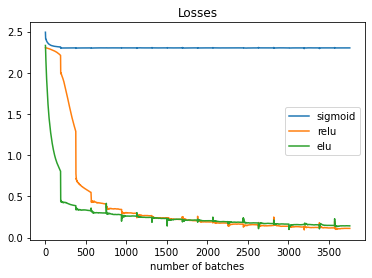

In [18]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.plot(np.arange(len(history_sigmoid.losses)),history_sigmoid.losses,label='sigmoid' )
plt.plot(np.arange(len(history_relu.losses)),history_relu.losses ,label='relu' )
plt.plot(np.arange(len(history_elu.losses)),history_elu.losses ,label='elu' )
plt.title('Losses')
plt.xlabel('number of batches')
plt.legend(loc='best')
plt.show()

## References:

https://arxiv.org/abs/1511.07289v1